In [1]:
import numpy as np, pandas as pd, glob, os, scipy.stats as ss
from matplotlib import pyplot as plt
from matplotlib import rc
xl280al = 'XL280'+r'$\alpha$'
xl280_label = 'XL280' +r'$\bf{a}$'
_431_label = '431'+r'$\mathrm{\alpha}$'
%matplotlib inline

In [2]:
plt.style.use(['tableau-colorblind10'])

In [3]:
import seaborn as sns
sns.set(font_scale=1)
## Set tick style
sns.set(style="ticks", context="talk")

In [4]:
ssk2 = pd.read_csv('../DATA/GENOTYPE/CNL05560.csv.gz',index_col=0)
ssk1 = pd.read_csv('../DATA/GENOTYPE/CNB03090.csv.gz',index_col=0)
ric8 = pd.read_csv('../DATA/GENOTYPE/CNN01270.csv.gz',index_col=0)

In [5]:
cdx_cross_info = pd.read_csv('../DATA/sra_crossinfo.csv',index_col=0)
cdx_cross_info.head()

,PB-name,Code,PB-index,Ill-index,Ill-name,Aneuploidy,Matgt,Matting,Cross,Sample,organism
Strain,,,,,,,,,,,
SS-A837,SS-A837_CGCTCAT-GGCTCTG-CR_Canu_polished_JRW-124,3,0,25,SS-A837-126,0,1.0,alpha,Parent,SS-A837_CGCTCAT-GGCTCTG,Crytpococcus deneoformans
SS-B358,RBB31_SS-B358_TCCGGAG-CAGGACG-CR_Canu_polished...,2,1,40,SS-B358-24,0,0.0,alpha,alpha-alpha,RBB31_SS-B358_TCCGGAG-CAGGACG,Crytpococcus deneoformans
SS-B565,SHSB3_05-SS-B565_CTGAAGC-AGGCGAA-CR_Canu_polis...,2,2,115,SS-B565-66,0,0.0,alpha,alpha-alpha,SHSB3_05-SS-B565_CTGAAGC-AGGCGAA,Crytpococcus deneoformans
SS-B368,RBB35_SS-B368_CGCTCAT-CCTATCC-CR_Canu_polished...,2,3,27,SS-B368-28,0,1.0,alpha,alpha-alpha,RBB35_SS-B368_CGCTCAT-CCTATCC,Crytpococcus deneoformans
SS-C030,RBB132_SS-C030_GTTTCG-CR_Canu_polished_JRW-5,1,4,73,SS-C030-5,0,missing,missing,a-alpha,RBB132_SS-C030_GTTTCG,Crytpococcus deneoformans


In [6]:
## Set paths for F1 segregants
file_path = '/home/croth/crypto-QTL-paper/DATA/PHENOTYPE/GROWTHCURVES/Tecan_qtlruns_Jan162019_curated_baselined_median51.csv.gz'

## Bring in segregant data
geno_path = '/home/croth/crypto-QTL-paper/DATA/GENOTYPE/CDx-ill-SNP-INDEL-df-104-blocked.csv.gz'

In [7]:
geno_df = pd.read_csv(geno_path)
strain_ix = geno_df.columns.tolist().index('Block') + 1
geno_strains = np.array(geno_df.columns.tolist()[strain_ix:])

In [8]:
chrlist = geno_df.Chrom.unique()
## Gather the length of each chromosome
clens = [geno_df[(geno_df.Chrom==chrom)]['Pos'].max() 
         for chrom in chrlist]
## Set mid points
chrom_midpts = 0.5 * np.sum(np.array([a 
                    for a in zip([0]+list(np.cumsum(clens)),
                            np.cumsum(clens))]),axis=1)
cumpos = [0] + list(np.cumsum(clens))[:-1]

In [9]:
## Set paths for F1 segregants
df = pd.read_csv(file_path,index_col=0)
dfcol = df.columns.tolist()
time_ix = dfcol.index('6300s')
times_ixs = dfcol[time_ix:]
df.index = df.strain
timex = [np.round(int(a[:-1])/(60**2),3) for a in times_ixs]
dx = np.max(np.diff(timex))

In [10]:
temp_drug = df[['amphB','temp']].drop_duplicates().reset_index(drop=True)
temp_drug.head()

,amphB,temp
0,0.000,30
1,0.075,30
2,0.125,30
3,0.175,30
4,0.000,37


In [11]:
bysex = cdx_cross_info[['Code']].T
bysex['XL280a'] = 3
bysex['XL280alpha'] = 3

In [12]:
segs = [s for s in df.strain.unique() if s in geno_df.columns]
len(segs)

104

In [13]:
bilabel = r'$\bf{a}$'+' - '+r'$\mathrm{\alpha}$'+' bisexual'
unilabel = r'$\mathrm{\alpha}$'+' - '+r'$\mathrm{\alpha}$'+' unisexual'

In [14]:
import statsmodels.formula.api as smf

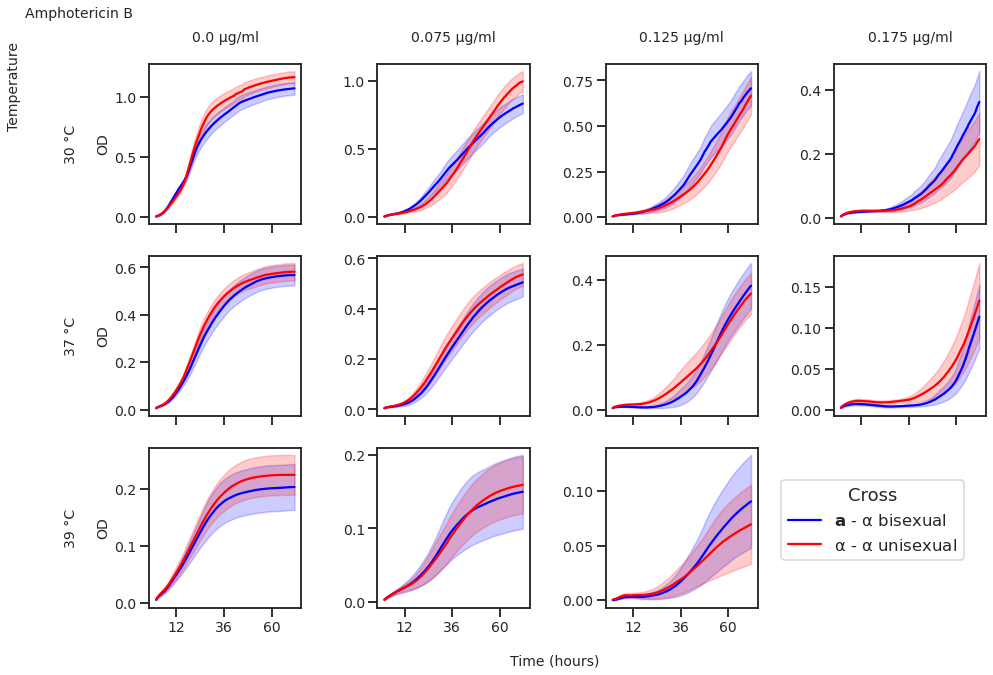

In [15]:
fig,ax = plt.subplots(3,4,figsize=(15,10),sharex=True)
z = 1.96
for i,(d,t) in temp_drug.iterrows():
    plt.sca(ax.ravel()[i])
    
    tempdfk = df[(df.temp==t)&
             (df.amphB==d)&
             (df.strain.isin(segs))]
    tempdfk.index = tempdfk.strain
    tempdfkm = tempdfk.groupby(tempdfk.index)[times_ixs].median()
    tempdfkm['Code'] = bysex[tempdfkm.index].T
    tempdfkm['AUC'] = tempdfkm[times_ixs].T.sum()*dx

    
    plt.title('%s \u03BCg/ml\n'%d if t == 30 else None,fontsize=14);
    plt.ylabel('%s \u00B0C\n\nOD'%int(t) if d == 0 else None,fontsize=14)
    
    
    #print(smf.ols('AUC~Code',data=tempdfkm[(tempdfkm.Code<3)]).fit().summary())
    
    plt.xticks([12,36,60],fontsize=14)
    plt.yticks(fontsize=14)
    for sc in [1,2]:
            g = tempdfkm[(tempdfkm.Code==sc)]
            
            m = g[times_ixs].mean()
            sm = ss.sem(g[times_ixs])
            plt.plot(timex,m,color='blue' if sc == 1 else 'red',
                     label=bilabel if sc == 1 else unilabel);
            plt.fill_between(timex,m-(sm*z),m+(sm*z),
                             alpha=0.2,color='blue' if sc == 1 else 'red')
            if i == 10:
        
                plt.legend(bbox_to_anchor=(1.1,0.85),title='Cross')
plt.subplots_adjust(wspace=0.5)
plt.sca(ax[-1,-1]);plt.axis('off');
fig.text(0.06,.95,'Amphotericin B',va='center',ha='center',fontsize=14);
fig.text(0.0,.85,'Temperature',va='center',ha='center',rotation=90,fontsize=14);
fig.text(0.5,0.051,'Time (hours)',va='center',ha='center',fontsize=14);
#plt.savefig('/home/croth/Desktop/bi-uniseuxal_growth_curves.pdf',
#            dpi=100,bbox_inches='tight');

In [16]:
phenopath = '/home/croth/Desktop/Cdx_phenotypes.csv.gz'
pheno = pd.read_csv(phenopath,index_col=0)

pheno['Code'] = tempdfkm.loc[pheno.index,'Code']
pheno.head()

,Melanin,Fludioxonil,H2O2,30_0.0,30_0.075,30_0.125,30_0.175,37_0.0,37_0.075,37_0.125,...,new_mosaic,SSK1r,SSK2r,RIC8r,AUC37,AUC_37,AUC39,AUC37amphb,AUC39amphb,Code
SS-A837,11169.802000,1.0,2.00,72.846625,6.396750,1.581000,2.054625,60.49275,39.584125,8.383125,...,1,431$\mathrm{\alpha}$,431$\mathrm{\alpha}$,431$\mathrm{\alpha}$,8.383125,2.895363,17.089875,8.383125,0.012600,3
SS-B307,12310.311000,1.0,0.75,41.768125,23.671750,13.471400,8.164875,25.04775,14.971500,2.394925,...,7,XL280$\bf{a}$,XL280$\bf{a}$,431$\mathrm{\alpha}$,2.394925,1.547555,15.147750,2.394925,0.000000,2
SS-B310,12255.142667,1.0,0.00,42.613800,5.368000,0.677750,0.385800,11.57150,0.609500,0.653250,...,5,431$\mathrm{\alpha}$,XL280$\bf{a}$,431$\mathrm{\alpha}$,0.653250,0.808239,0.001550,0.653250,0.035575,2
SS-B311,14045.272333,0.0,4.00,51.629500,47.838975,37.815875,26.589250,25.22050,21.242500,18.908500,...,3,XL280$\bf{a}$,431$\mathrm{\alpha}$,431$\mathrm{\alpha}$,18.908500,4.348391,8.145000,18.908500,4.815250,2
SS-B312,18635.336333,0.0,5.00,34.049937,22.844500,5.067400,1.533375,16.75800,13.019000,5.445800,...,2,XL280$\bf{a}$,431$\mathrm{\alpha}$,XL280$\bf{a}$,5.445800,2.333624,8.318375,5.445800,0.355025,2


KruskalResult(statistic=2.1295512671471784, pvalue=0.14448304773156345)
KstestResult(statistic=0.24150197628458497, pvalue=0.08725831234068515)


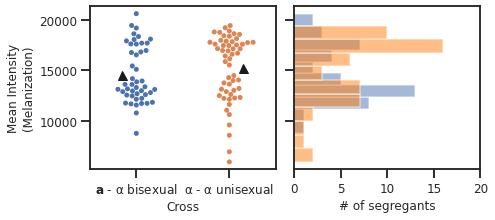

In [17]:
fig,ax = plt.subplots(1,2,figsize=(7,3),sharey=True)
plt.sca(ax[0])
sns.swarmplot(x='Code',y='Melanin',
              data=pheno[(pheno.Code<3)]);
plt.xticks([0,1],[bilabel,unilabel],fontsize=12);
plt.xlabel('Cross',fontsize=12);
plt.ylabel('Mean Intensity\n(Melanization)',fontsize=12)
plt.plot([-0.15,1.15],
         pheno[(pheno.Code<3)
              ].groupby('Code').mean()['Melanin'],'k^');
plt.yticks(fontsize=12)

plt.sca(ax[1])
plt.hist(pheno[(pheno.Code==1)]['Melanin'].values,
         color='b',alpha=0.5,orientation='horizontal')

plt.hist(pheno[(pheno.Code==2)]['Melanin'].values,
         color='tab:orange',alpha=0.5,orientation='horizontal');

plt.xticks(np.arange(0,25,5),fontsize=12)
plt.xlabel('# of segregants',fontsize=12)
plt.subplots_adjust(wspace=0.1)

print(ss.kruskal(pheno[(pheno.Code==1)]['Melanin'].values,
          pheno[(pheno.Code==2)]['Melanin'].values))

print(ss.ks_2samp(pheno[(pheno.Code==1)]['Melanin'].values,
          pheno[(pheno.Code==2)]['Melanin'].values))

KruskalResult(statistic=0.449387217917044, pvalue=0.5026260985148273)
KstestResult(statistic=0.1442687747035573, pvalue=0.6046293903600235)


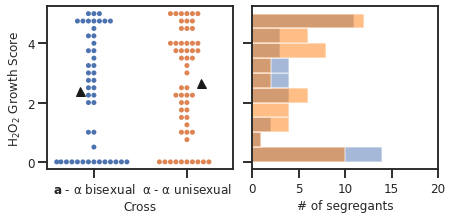

In [18]:
fig,ax = plt.subplots(1,2,figsize=(7,3),sharey=True)
plt.sca(ax[0])
sns.swarmplot(x='Code',y='H2O2',
              data=pheno[(pheno.Code<3)]);
plt.xticks([0,1],[bilabel,unilabel],fontsize=12);
plt.xlabel('Cross',fontsize=12);
plt.ylabel('H$_2$O$_2$ Growth Score',fontsize=12)
plt.plot([-0.15,1.15],
         pheno[(pheno.Code<3)
              ].groupby('Code').mean()['H2O2'],'k^');
plt.yticks(fontsize=12)

plt.sca(ax[1])
plt.hist(pheno[(pheno.Code==1)]['H2O2'].values,
         color='b',alpha=0.5,orientation='horizontal')

plt.hist(pheno[(pheno.Code==2)]['H2O2'].values,
         color='tab:orange',alpha=0.5,orientation='horizontal');

plt.xticks(np.arange(0,25,5),fontsize=12)
plt.xlabel('# of segregants',fontsize=12)
plt.subplots_adjust(wspace=0.1)

print(ss.kruskal(pheno[(pheno.Code==1)]['H2O2'].values,
          pheno[(pheno.Code==2)]['H2O2'].values))

print(ss.ks_2samp(pheno[(pheno.Code==1)]['H2O2'].values,
          pheno[(pheno.Code==2)]['H2O2'].values))

KruskalResult(statistic=1.8974192048360692, pvalue=0.16836747680316466)
KstestResult(statistic=0.16403162055335968, pvalue=0.4510150107454105)


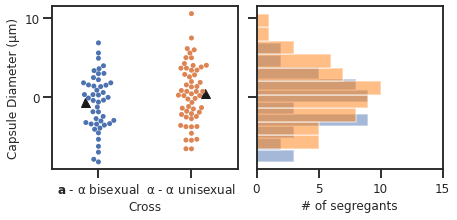

In [19]:
pho = 'Capsule_diameter_residual'
mylabel = 'Capsule Diameter (\u03BCm)'
fig,ax = plt.subplots(1,2,figsize=(7,3),sharey=True)
plt.sca(ax[0])
sns.swarmplot(x='Code',y=pho,
              data=pheno[(pheno.Code<3)]);
plt.xticks([0,1],[bilabel,unilabel],fontsize=12);
plt.xlabel('Cross',fontsize=12);
plt.ylabel(mylabel,fontsize=12)
plt.plot([-0.15,1.15],
         pheno[(pheno.Code<3)
              ].groupby('Code').mean()[pho],'k^');
plt.yticks(fontsize=12)

plt.sca(ax[1])
plt.hist(pheno[(pheno.Code==1)][pho].values,
         color='b',alpha=0.5,orientation='horizontal')

plt.hist(pheno[(pheno.Code==2)][pho].values,
         color='tab:orange',alpha=0.5,orientation='horizontal');

plt.xticks(np.arange(0,20,5),fontsize=12)
plt.xlabel('# of segregants',fontsize=12)
plt.subplots_adjust(wspace=0.1)

print(ss.kruskal(pheno[(pheno.Code==1)][pho].values,
          pheno[(pheno.Code==2)][pho].values))

print(ss.ks_2samp(pheno[(pheno.Code==1)][pho].values,
          pheno[(pheno.Code==2)][pho].values))

/home/croth/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KruskalResult(statistic=0.09441434313246401, pvalue=0.7586384997313331)
KstestResult(statistic=0.09841897233201581, pvalue=0.940976281377595)


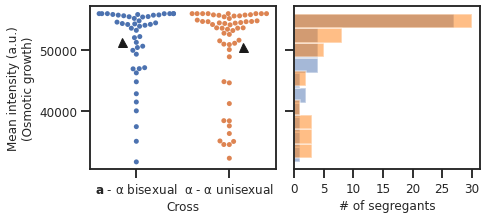

In [20]:
pho = 'NaCl_1M'
mylabel = 'Mean intensity (a.u.)\n(Osmotic growth)'
fig,ax = plt.subplots(1,2,figsize=(7,3),sharey=True)
plt.sca(ax[0])
sns.swarmplot(x='Code',y=pho,
              data=pheno[(pheno.Code<3)]);
plt.xticks([0,1],[bilabel,unilabel],fontsize=12);
plt.xlabel('Cross',fontsize=12);
plt.ylabel(mylabel,fontsize=12)
plt.plot([-0.15,1.15],
         pheno[(pheno.Code<3)
              ].groupby('Code').mean()[pho],'k^');
plt.yticks(fontsize=12)

plt.sca(ax[1])
plt.hist(pheno[(pheno.Code==1)][pho].values,
         color='b',alpha=0.5,orientation='horizontal')

plt.hist(pheno[(pheno.Code==2)][pho].values,
         color='tab:orange',alpha=0.5,orientation='horizontal');

plt.xticks(np.arange(0,35,5),fontsize=12)
plt.xlabel('# of segregants',fontsize=12)
plt.subplots_adjust(wspace=0.1)

print(ss.kruskal(pheno[(pheno.Code==1)][pho].values,
          pheno[(pheno.Code==2)][pho].values))

print(ss.ks_2samp(pheno[(pheno.Code==1)][pho].values,
          pheno[(pheno.Code==2)][pho].values))

KruskalResult(statistic=9.568235362838106, pvalue=0.001979729875574166)
KstestResult(statistic=0.21462450592885376, pvalue=0.16657242569634)


/home/croth/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/croth/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


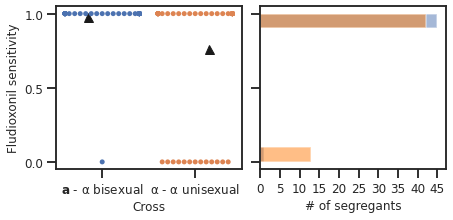

In [21]:
pho = 'Fludioxonil'
mylabel = 'Fludioxonil sensitivity'
fig,ax = plt.subplots(1,2,figsize=(7,3),sharey=True)
plt.sca(ax[0])
sns.swarmplot(x='Code',y=pho, 
              data=pheno[(pheno.Code<3)]);
plt.xticks([0,1],[bilabel,unilabel],fontsize=12);
plt.xlabel('Cross',fontsize=12);
plt.ylabel(mylabel,fontsize=12)
plt.plot([-0.15,1.15],
         pheno[(pheno.Code<3)
              ].groupby('Code').mean()[pho],'k^');
plt.yticks(fontsize=12)

plt.sca(ax[1])
plt.hist(pheno[(pheno.Code==1)][pho].values,
         color='b',alpha=0.5,orientation='horizontal')

plt.hist(pheno[(pheno.Code==2)][pho].values,
         color='tab:orange',alpha=0.5,orientation='horizontal');

plt.xticks(np.arange(0,50,5),fontsize=12)
plt.xlabel('# of segregants',fontsize=12)
plt.subplots_adjust(wspace=0.1)

print(ss.kruskal(pheno[(pheno.Code==1)][pho].values,
          pheno[(pheno.Code==2)][pho].values))

print(ss.ks_2samp(pheno[(pheno.Code==1)][pho].values,
          pheno[(pheno.Code==2)][pho].values))

In [22]:
mylabel

'Fludioxonil sensitivity'

In [23]:
#ss.binom_test(pheno_segs.groupby('SSK2').count()['Melanin'].values)

In [24]:
pheno_segs = pheno[(pheno.Code<3)].copy()
pheno_segs['Cross'] = pheno['Code'].replace(dict(zip([1,2],
                                        [bilabel,unilabel])))
#pheno_segs['Fludioxonil']

In [38]:
test = pd.crosstab(pheno_segs.Fludioxonil,
            [pheno_segs.Cross,pheno.SSK1r,pheno.SSK2r])
test

Cross       $\bf{a}$ - $\mathrm{\alpha}$ bisexual                \
SSK1r                        431$\mathrm{\alpha}$                 
SSK2r                        431$\mathrm{\alpha}$ XL280$\bf{a}$   
Fludioxonil                                                       
0.0                                             0             0   
1.0                                             3            22   

Cross                                           \
SSK1r              XL280$\bf{a}$                 
SSK2r       431$\mathrm{\alpha}$ XL280$\bf{a}$   
Fludioxonil                                      
0.0                            1             0   
1.0                            0            20   

Cross       $\mathrm{\alpha}$ - $\mathrm{\alpha}$ unisexual                \
SSK1r                                  431$\mathrm{\alpha}$                 
SSK2r                                  431$\mathrm{\alpha}$ XL280$\bf{a}$   
Fludioxonil                                                                 
0.0                                                       0             0   
1.0                                                      15            15   

Cross                                           
SSK1r              XL280$\bf{a}$                
SSK2r       431$\mathrm{\alpha}$ XL280$\bf{a}$  
Fludioxonil                                     
0.0                           13             0  
1.0                            6             6

In [36]:
pd.crosstab(pheno_segs.Cross,[pheno.SSK1r,pheno.SSK2r],margins=True)

SSK1r                                           431$\mathrm{\alpha}$  \
SSK2r                                           431$\mathrm{\alpha}$   
Cross                                                                  
$\bf{a}$ - $\mathrm{\alpha}$ bisexual                              3   
$\mathrm{\alpha}$ - $\mathrm{\alpha}$ unisexual                   15   
All                                                               18   

SSK1r                                                          \
SSK2r                                           XL280$\bf{a}$   
Cross                                                           
$\bf{a}$ - $\mathrm{\alpha}$ bisexual                      22   
$\mathrm{\alpha}$ - $\mathrm{\alpha}$ unisexual            15   
All                                                        37   

SSK1r                                                  XL280$\bf{a}$  \
SSK2r                                           431$\mathrm{\alpha}$   
Cross                                                                  
$\bf{a}$ - $\mathrm{\alpha}$ bisexual                              1   
$\mathrm{\alpha}$ - $\mathrm{\alpha}$ unisexual                   19   
All                                                               20   

SSK1r                                                          All  
SSK2r                                           XL280$\bf{a}$       
Cross                                                               
$\bf{a}$ - $\mathrm{\alpha}$ bisexual                      20   46  
$\mathrm{\alpha}$ - $\mathrm{\alpha}$ unisexual             6   55  
All                                                        26  101

In [27]:
pd.crosstab(pheno_segs.Cross,pheno.SSK1r,margins=True)

SSK1r,431$\mathrm{\alpha}$,XL280$\bf{a}$,All
Cross,,,
$\bf{a}$ - $\mathrm{\alpha}$ bisexual,25,21,46
$\mathrm{\alpha}$ - $\mathrm{\alpha}$ unisexual,30,25,55
All,55,46,101


In [28]:
fludio_by_sex = pd.crosstab(pheno_segs.Fludioxonil,
                    pheno_segs.Cross)
print(ss.fisher_exact(fludio_by_sex))
fludio_by_sex

(0.07179487179487179, 0.0026263910120834675)


Cross,$\bf{a}$ - $\mathrm{\alpha}$ bisexual,$\mathrm{\alpha}$ - $\mathrm{\alpha}$ unisexual
Fludioxonil,,
0.0,1,13
1.0,45,42


In [29]:
#pd.crosstab(pheno[['SSK1r','SSK2r','Fludioxonil','Code']],
#             colnames=['Code'],rownames=[['SSK1r','SSK2r']])

In [30]:
#pd.crosstab(pheno[['SSK1r','SSK2r','Fludioxonil','Code']])

In [31]:
pheno[(pheno.Fludioxonil==0)][['SSK1r','SSK2r','Fludioxonil','Code']]

,SSK1r,SSK2r,Fludioxonil,Code
SS-B311,XL280$\bf{a}$,431$\mathrm{\alpha}$,0.0,2
SS-B312,XL280$\bf{a}$,431$\mathrm{\alpha}$,0.0,2
SS-B313,XL280$\bf{a}$,431$\mathrm{\alpha}$,0.0,2
SS-B315,XL280$\bf{a}$,431$\mathrm{\alpha}$,0.0,2
SS-B356,XL280$\bf{a}$,431$\mathrm{\alpha}$,0.0,2
SS-B378,XL280$\bf{a}$,431$\mathrm{\alpha}$,0.0,2
SS-B560,XL280$\bf{a}$,431$\mathrm{\alpha}$,0.0,2
SS-B565,XL280$\bf{a}$,431$\mathrm{\alpha}$,0.0,2
SS-B570,XL280$\bf{a}$,431$\mathrm{\alpha}$,0.0,2
SS-B579,XL280$\bf{a}$,431$\mathrm{\alpha}$,0.0,2


KruskalResult(statistic=5.3754940711462496, pvalue=0.02042155630687053)
KstestResult(statistic=0.27430830039525694, pvalue=0.035742344948747506)


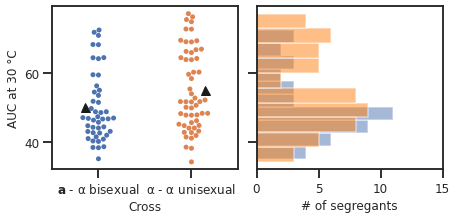

In [32]:
pho = '30_0.0'
mylabel = 'AUC at 30 °C'
fig,ax = plt.subplots(1,2,figsize=(7,3),sharey=True)
plt.sca(ax[0])
sns.swarmplot(x='Code',y=pho,
              data=pheno[(pheno.Code<3)]);
plt.xticks([0,1],[bilabel,unilabel],fontsize=12);
plt.xlabel('Cross',fontsize=12);
plt.ylabel(mylabel,fontsize=12)
plt.plot([-0.15,1.15],
         pheno[(pheno.Code<3)
              ].groupby('Code').mean()[pho],'k^');
plt.yticks(fontsize=12)

plt.sca(ax[1])
plt.hist(pheno[(pheno.Code==1)][pho].values,
         color='b',alpha=0.5,orientation='horizontal')

plt.hist(pheno[(pheno.Code==2)][pho].values,
         color='tab:orange',alpha=0.5,orientation='horizontal');

plt.xticks(np.arange(0,20,5),fontsize=12)
plt.xlabel('# of segregants',fontsize=12)
plt.subplots_adjust(wspace=0.1)

print(ss.kruskal(pheno[(pheno.Code==1)][pho].values,
          pheno[(pheno.Code==2)][pho].values))

print(ss.ks_2samp(pheno[(pheno.Code==1)][pho].values,
          pheno[(pheno.Code==2)][pho].values))

/home/croth/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/croth/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/croth/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


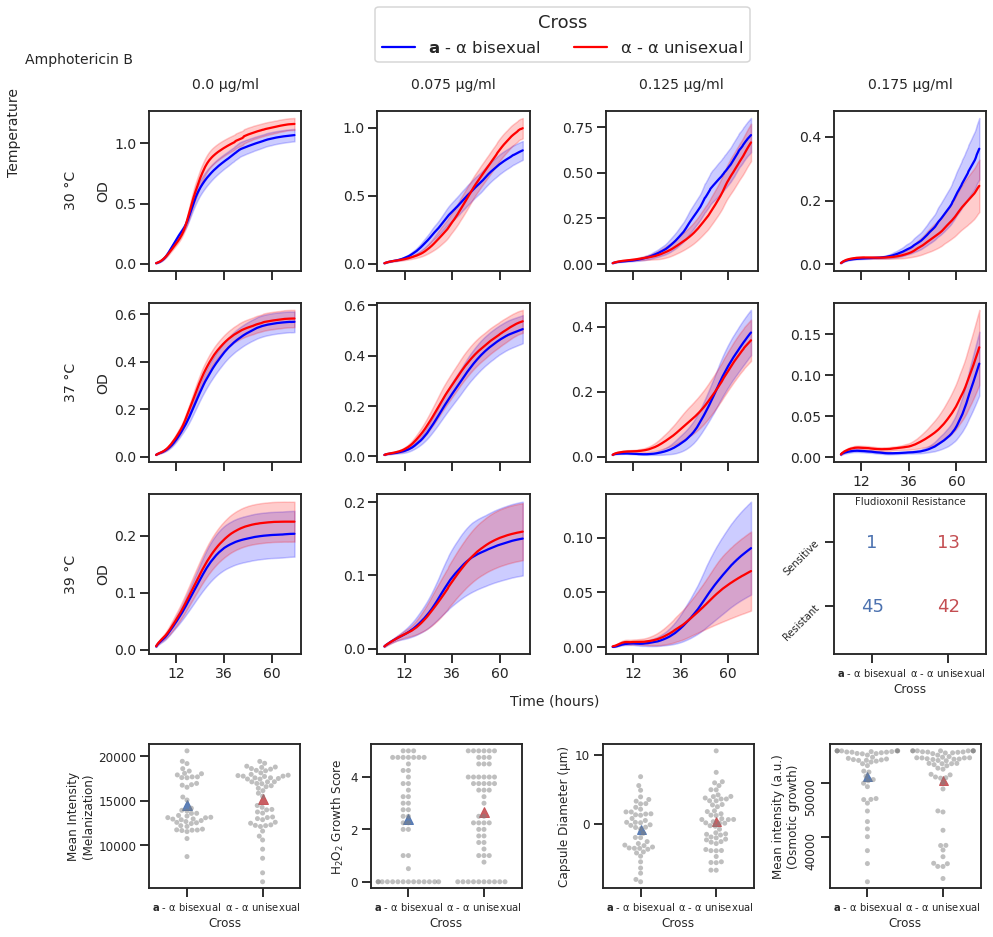

In [33]:
fig,ax = plt.subplots(3,4,figsize=(15,10))
z = 1.96
for i,(d,t) in temp_drug.iterrows():
    plt.sca(ax.ravel()[i])
    
    tempdfk = df[(df.temp==t)&
             (df.amphB==d)&
             (df.strain.isin(segs))]
    tempdfk.index = tempdfk.strain
    tempdfkm = tempdfk.groupby(tempdfk.index)[times_ixs].median()
    tempdfkm['Code'] = bysex[tempdfkm.index].T
    tempdfkm['AUC'] = tempdfkm[times_ixs].T.sum()*dx

    
    plt.title('%s \u03BCg/ml\n'%d if t == 30 else None,fontsize=14);
    plt.ylabel('%s \u00B0C\n\nOD'%int(t) if d == 0 else None,fontsize=14)
    
    
    #print(smf.ols('AUC~Code',data=tempdfkm[(tempdfkm.Code<3)]).fit().summary())
    
    plt.xticks([12,36,60],labels=[12,36,60] if i > 6 else ['','',''],fontsize=14)
    plt.yticks(fontsize=14)
    for sc in [1,2]:
            g = tempdfkm[(tempdfkm.Code==sc)]
            
            m = g[times_ixs].mean()
            sm = ss.sem(g[times_ixs])
            plt.plot(timex,m,color='blue' if sc == 1 else 'red',
                     label=bilabel if sc == 1 else unilabel);
            plt.fill_between(timex,m-(sm*z),m+(sm*z),
                             alpha=0.2,color='blue' if sc == 1 else 'red')
            if i == 1:
        
                plt.legend(bbox_to_anchor=(2.5,1.7),ncol=2,title='Cross')
plt.subplots_adjust(wspace=0.5)
plt.sca(ax[-1,-1]);


plt.text(x=0.25,y=.7,s='1',horizontalalignment='center',
         verticalalignment='center', 
         transform=ax[-1,-1].transAxes,color='b')
plt.text(x=0.25,y=.3,s='45',horizontalalignment='center',
         verticalalignment='center', 
         transform=ax[-1,-1].transAxes,color='b')
plt.text(x=0.75,y=.7,s='13',horizontalalignment='center',
         verticalalignment='center', 
         transform=ax[-1,-1].transAxes,color='r')
plt.text(x=0.75,y=.3,s='42',horizontalalignment='center',
         verticalalignment='center', 
         transform=ax[-1,-1].transAxes,color='r')
plt.xticks([0.25,0.75],[bilabel,unilabel],fontsize=10)
plt.xlabel('Cross',fontsize=12)
plt.yticks([0.3,0.7],['Resistant','Sensitive'],fontsize=10,rotation=45);
plt.title('Fludioxonil Resistance',fontsize=10,y=0.9)



fig.text(0.06,.95,'Amphotericin B',va='center',ha='center',fontsize=14);
fig.text(0.0,.85,'Temperature',va='center',ha='center',rotation=90,fontsize=14);
fig.text(0.5,0.06,'Time (hours)',va='center',ha='center',fontsize=14);

axm = fig.add_axes([0.125,-0.2,0.14,0.2])
plt.sca(axm)

sns.swarmplot(x='Code',y='Melanin',
              data=pheno[(pheno.Code<3)],color='grey',alpha=0.5);
plt.xticks([0,1],[bilabel,unilabel],fontsize=10);
plt.xlabel('Cross',fontsize=12);
plt.ylabel('Mean Intensity\n(Melanization)',fontsize=12)
[plt.plot(i-1,pheno[(pheno.Code==i)].groupby('Code').mean()
          ['Melanin'],'^',color='r' if i == 2 else 'b' ,alpha=0.9,
          markersize=10) for i in [1,2]]
plt.yticks(fontsize=12)


axh = fig.add_axes([0.33,-0.2,0.14,0.2])
plt.sca(axh)
sns.swarmplot(x='Code',y='H2O2',
              data=pheno[(pheno.Code<3)],color='grey',alpha=0.5)
plt.xticks([0,1],[bilabel,unilabel],fontsize=10);
plt.xlabel('Cross',fontsize=12);
plt.ylabel('H$_2$O$_2$ Growth Score',fontsize=12)
[plt.plot(i-1,pheno[(pheno.Code==i)
              ].groupby('Code').mean()['H2O2'],
          '^',markersize=10,alpha=0.9,
          color='r' if i ==2 else 'b') for i in [1,2]]
plt.yticks(fontsize=12)



axc = fig.add_axes([0.545,-0.2,0.14,0.2])
plt.sca(axc)
sns.swarmplot(x='Code',y='Capsule_diameter_residual',
              data=pheno[(pheno.Code<3)],color='grey',alpha=0.5)
plt.xticks([0,1],[bilabel,unilabel],fontsize=10);
plt.xlabel('Cross',fontsize=12);
plt.ylabel('Capsule Diameter (\u03BCm)',fontsize=12)
[plt.plot(i-1,pheno[(pheno.Code==i)].groupby('Code').mean()[
             'Capsule_diameter_residual'],'^',
          alpha=0.9,color='r'if i ==2 else 'b') for i in [1,2]]
plt.yticks(fontsize=12);

axo = fig.add_axes([0.755,-0.2,0.14,0.2])
plt.sca(axo)
pho = 'NaCl_1M'
mylabel = 'Mean intensity (a.u.)\n(Osmotic growth)'
sns.swarmplot(x='Code',y=pho,color='grey',alpha=0.5,
              data=pheno[(pheno.Code<3)]);
plt.xticks([0,1],[bilabel,unilabel],fontsize=10);
plt.xlabel('Cross',fontsize=12);
plt.ylabel(mylabel,fontsize=12)
[plt.plot(i-1,pheno[(pheno.Code==i)].groupby('Code').mean()[pho],
          '^',alpha=0.9,color='r'if i ==2 else 'b') for i in [1,2]]
plt.yticks(fontsize=12,rotation=90);

plt.savefig('/home/croth/Desktop/bi-uniseuxal_phenotypes.pdf',
            dpi=200,bbox_inches='tight');

In [34]:
fludio_by_sex

Cross,$\bf{a}$ - $\mathrm{\alpha}$ bisexual,$\mathrm{\alpha}$ - $\mathrm{\alpha}$ unisexual
Fludioxonil,,
0.0,1,13
1.0,45,42
